# Training model

By: Javier Martínez

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,\
                             accuracy_score,precision_score,recall_score, roc_curve, auc)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

Data Base

In [2]:
pd_MeLi_ = pd.read_pickle('./data/data_base.pkl')
pd_MeLi = pd_MeLi_.set_index('id',drop=True).copy()

In [3]:
all_features = ['buying_mode',	#str** no ayuda mucho
                #'seller_address_country',	#str
                'seller_address_state',	#str
                #'seller_address_city',	#str
                'status', #str **
                #'title', #str
                'listing_type_id', # puede ser
                #'category_id', #str
                #'currency_id', #str	
                #'tags_no_list',
                'mode',#str ** no ayuda mucho

                # Boleanos
                'accepts_mercadopago',	# boolean** algo
                'automatic_relist',	# boleano**algo
                'training_data', # boleano#=======
                'local_pick_up', #boleano**algo
                'free_shipping',#boleano**algo
                'condition_new',	#boleano #=======
                'title_new',
                'title_usado',
                'official_store_id_new',
                'warranty_no',
                'warranty_yes',

                'MLAAM', # mas aporta
                'MLABC',	
                'MLACD',	
                'MLADC',	
                'MLAMC',	
                'MLAMO',	
                'MLAMP',
                'MLAMS',	
                'MLAOT',
                'MLATB',	
                'MLAVE',
                'MLAVS',	
                'MLAWC',	
                'MLAWT',

                # Numero
                'sold_quantity',	# entero algo
                'base_price',	#numero** **nada
                #'price', #numero ** **nada
                #'seller_id',	#int
                'initial_quantity', # entero **
                'available_quantity',	# entero ** elimina
        ]


pd_model = pd_MeLi[all_features].copy()

In [4]:
dummies = ['buying_mode',	#str**
            #'seller_address_country',	#str
            'seller_address_state',	#str
            #'seller_address_city',	#str
            'status', #str **
            #'title', #str
            'listing_type_id',	#str
            #'category_id', #str
            #'currency_id', #str	
            #'tags_no_list',
            'mode',#str **
            ]

pd_x_data = pd.get_dummies(pd_model,columns=dummies)

In [5]:
numbers = [ 'sold_quantity',	# entero
            'base_price',	#numero**
            #'price', #numero **
            #'seller_id',	#int
            'initial_quantity', # entero **
            'available_quantity',	# entero **
            ]

scaler = MinMaxScaler()
scaler.fit(pd_x_data[numbers])

MinMaxScaler()

In [6]:
pd_x_data[numbers] = scaler.transform(pd_x_data[numbers])

In [7]:
out = 'condition_new'

Data for Model

In [8]:
# Training data
pandas_x_training = pd_x_data.query('training_data==1').copy().fillna(0).astype(float)
pandas_y_training = pandas_x_training[out].astype(int)
pandas_x_training.drop(labels=['training_data',out],axis=1,inplace=True)
pandas_x_training.head(3)

,accepts_mercadopago,automatic_relist,local_pick_up,free_shipping,title_new,title_usado,official_store_id_new,warranty_no,warranty_yes,MLAAM,...,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,mode_custom,mode_me1,mode_me2,mode_not_specified
id,,,,,,,,,,,,,,,,,,,,,
MLA4695330653,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
MLA7160447179,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
MLA7367189936,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
pandas_x_training.shape[0]

90000

In [10]:
# Test Data
pandas_x_test = pd_x_data.query('training_data==0').copy().fillna(0).astype(float)
pandas_y_test = pandas_x_test[[out]].astype(int)
pandas_x_test.drop(labels=['training_data',out],axis=1,inplace=True)
pandas_x_test.head(3)

,accepts_mercadopago,automatic_relist,local_pick_up,free_shipping,title_new,title_usado,official_store_id_new,warranty_no,warranty_yes,MLAAM,...,listing_type_id_free,listing_type_id_gold,listing_type_id_gold_premium,listing_type_id_gold_pro,listing_type_id_gold_special,listing_type_id_silver,mode_custom,mode_me1,mode_me2,mode_not_specified
id,,,,,,,,,,,,,,,,,,,,,
MLA9379759063,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
MLA8701321701,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
MLA7219741922,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
pandas_x_test.shape[0]

10000

### Training Models

eXtreme Gradient Boosting

In [12]:
seed = 7

In [13]:
class XGB_MODEL():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,n_estimators):

        self.n_estimators = n_estimators

        np.random.seed(seed)
        # Model
        self.model = XGBClassifier(n_estimators=n_estimators,
                                   verbosity=0)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'n_estimators':n_estimators},index=[0])

    @staticmethod
    def select_model(n_estimators):
        xgb_model = XGB_MODEL(pandas_x_training,
                            pandas_y_training,
                            pandas_x_test,
                            pandas_y_test)
        xgb_model.training(n_estimators=n_estimators)
        return xgb_model

Decision Tree 

In [14]:

class DecisionTree_MODEL():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,criterion='gini', splitter='best', max_depth=None):

        np.random.seed(seed)
        # Model
        self.model = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'criterion':criterion,
                                    'splitter':splitter,
                                    'max_depth':max_depth
                                    },index=[0])
                                    
    @staticmethod
    def select_model(criterion='gini', splitter='best', max_depth=None):

        model = DecisionTree_MODEL(pandas_x_training,
                                        pandas_y_training,
                                        pandas_x_test,
                                        pandas_y_test)
        model.training(criterion=criterion, splitter=splitter, max_depth=max_depth)
        return model

RandomForest

In [15]:

class RandomForestClassifier_MODEL():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,n_estimators=100,criterion='gini', max_depth=None):

        np.random.seed(seed)
        # Model
        self.model = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion, max_depth=max_depth)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'criterion':criterion,
                                    'max_depth':max_depth,
                                    'n_estimators':n_estimators
                                    },index=[0])
                                    
    @staticmethod
    def select_model(n_estimators=100,criterion='gini',max_depth=None):

        model = RandomForestClassifier_MODEL(pandas_x_training,
                                        pandas_y_training,
                                        pandas_x_test,
                                        pandas_y_test)
        model.training(n_estimators=n_estimators,criterion=criterion, max_depth=max_depth)
        return model

Gradient boosting

In [16]:
class GradientBoostingClassifier_Model():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,learning_rate,n_estimators):

        np.random.seed(seed)
        # Model
        self.model = GradientBoostingClassifier(learning_rate=learning_rate,n_estimators=n_estimators)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'learning_rate':learning_rate,
                                    'n_estimators':n_estimators
                                    },index=[0])
                                    
    @staticmethod
    def select_model(learning_rate,n_estimators):

        model = GradientBoostingClassifier_Model(pandas_x_training,
                                        pandas_y_training,
                                        pandas_x_test,
                                        pandas_y_test)
        model.training( learning_rate=learning_rate, n_estimators=n_estimators)
        return model

SVM

In [17]:
class SVM_Model():
    """
    model training
    """

    def __init__(self,pandas_x_training,
                    pandas_y_training,
                    pandas_x_test,
                    pandas_y_test):

        self.pandas_x_training = pandas_x_training
        self.pandas_y_training = pandas_y_training
        self.pandas_x_test = pandas_x_test
        self.pandas_y_test = pandas_y_test

    def training(self,C=1.0,kernel='rbd',degree=3,gamma='scale'):

        np.random.seed(10)
        # Model
        self.model = SVC(C=C,kernel=kernel,degree=degree,gamma=gamma)

        # Fit
        self.model.fit(self.pandas_x_training.values,
                      self.pandas_y_training.values
                    )

        # Metrics
        self.prediction = self.model.predict(pandas_x_test.values)
        self.accuracy = accuracy_score(self.pandas_y_test.values, self.prediction)
        self.precision = precision_score(pandas_y_test.values, self.prediction)
        self.recall =recall_score(self.pandas_y_test.values, self.prediction)

        fpr, tpr, thresholds = roc_curve(self.pandas_y_test.values, self.prediction, pos_label=1)
        self.auc = auc(fpr, tpr)

        self.confusion_matrix = confusion_matrix(self.pandas_y_test.values,self.prediction)

        # Plot
        self.plot_matrix = ConfusionMatrixDisplay(confusion_matrix=self.confusion_matrix)

        # Summary
        self.summary = pd.DataFrame({'accuracy':self.accuracy,
                                    'precision':self.precision,
                                    'recall':self.recall,
                                    'auc':self.auc,
                                    'C':C,
                                    'kernel':kernel,
                                    'degree':degree,
                                   'gamma':gamma
                                    },index=[0])
                                    
    @staticmethod
    def select_model(C,kernel,degree,gamma):

        model = SVM_Model(pandas_x_training,
                                        pandas_y_training,
                                        pandas_x_test,
                                        pandas_y_test)
        model.training(C=C,kernel=kernel,degree=degree,gamma=gamma)
        return model

In [18]:
#=====================
#DecisionTree_MODEL
#=====================
DecisionTree_models = list(map(lambda x,y: DecisionTree_MODEL.select_model(criterion=x, splitter=y, max_depth=None),\
                                                                        ['gini','gini','entropy','entropy','log_loss','log_loss'],
                                                                        ['best','random','best','random','best','random']
                                                                        ))

# Summary 
DecisionTree_summary = pd.concat(list(map(lambda x: x.summary, DecisionTree_models)))
DecisionTree_summary.to_csv('./summary/dt.csv')
DecisionTree_summary.round(2)

,accuracy,precision,recall,auc,criterion,splitter,max_depth
0,0.83,0.90,0.77,0.83,gini,best,None
0,0.83,0.88,0.80,0.84,gini,random,None
0,0.83,0.90,0.77,0.83,entropy,best,None
0,0.83,0.87,0.81,0.83,entropy,random,None
0,0.83,0.90,0.77,0.83,log_loss,best,None
0,0.83,0.87,0.81,0.83,log_loss,random,None


In [19]:
#=====================
#RandomForestClassifier_MODEL
#=====================
RandomForest_models = list(map(lambda x,y: RandomForestClassifier_MODEL.select_model(n_estimators=y, criterion=x, max_depth=None),\
                                                                                4*['entropy'],
                                                                                [100,200,300,400]
                                                                                ))

# Summary 
RandomForest_summary = pd.concat(list(map(lambda x: x.summary, RandomForest_models)))
RandomForest_summary.to_csv('./summary/rf.csv')
RandomForest_summary.round(2)

,accuracy,precision,recall,auc,criterion,max_depth,n_estimators
0,0.84,0.9,0.79,0.84,entropy,None,100
0,0.84,0.9,0.79,0.84,entropy,None,200
0,0.84,0.9,0.79,0.84,entropy,None,300
0,0.84,0.9,0.79,0.84,entropy,None,400


In [20]:
#=====================
#GradientBoostingClassifier_Model
#=====================
GradientBoosting_models = list(map(lambda x,y: GradientBoostingClassifier_Model.select_model(learning_rate=x, n_estimators=y),\
                                                                                        [0.1,0.1,0.1,0.1,
                                                                                         0.3,0.3,0.3,0.3],
                                                                                        [100,200,300,400,
                                                                                         100,200,300,400]
                                                                                        ))

# Summary 
GradientBoosting = pd.concat(list(map(lambda x: x.summary, GradientBoosting_models)))
GradientBoosting.to_csv('./summary/gb.csv')
GradientBoosting.round(2)

,accuracy,precision,recall,auc,learning_rate,n_estimators
0,0.83,0.91,0.76,0.84,0.1,100
0,0.83,0.91,0.76,0.84,0.1,200
0,0.83,0.90,0.77,0.84,0.1,300
0,0.83,0.90,0.77,0.84,0.1,400
0,0.83,0.89,0.79,0.84,0.3,100
0,0.83,0.90,0.79,0.84,0.3,200
0,0.84,0.90,0.79,0.84,0.3,300
0,0.84,0.90,0.79,0.84,0.3,400


In [21]:
#=====================
#XGB_MODEL
#=====================
xgb_models= list(map(lambda x: XGB_MODEL.select_model(n_estimators=x),\
                                                [50,100,200,300,400,500]))

# Summary 
xgb_summary = pd.concat(list(map(lambda x: x.summary, xgb_models)))
xgb_summary.to_csv('./summary/xgb.csv')
xgb_summary.round(2)

,accuracy,precision,recall,auc,n_estimators
0,0.85,0.88,0.84,0.86,50
0,0.86,0.89,0.84,0.86,100
0,0.86,0.89,0.84,0.86,200
0,0.86,0.89,0.84,0.86,300
0,0.86,0.89,0.84,0.86,400
0,0.86,0.89,0.84,0.86,500


Best Model

In [24]:
# Best Model
best_model = list(filter(lambda x: x.n_estimators == 100,xgb_models))

In [25]:
# Confusion Matrix Best Model
best_model[0].confusion_matrix

array([[4043,  551],
       [ 846, 4560]])

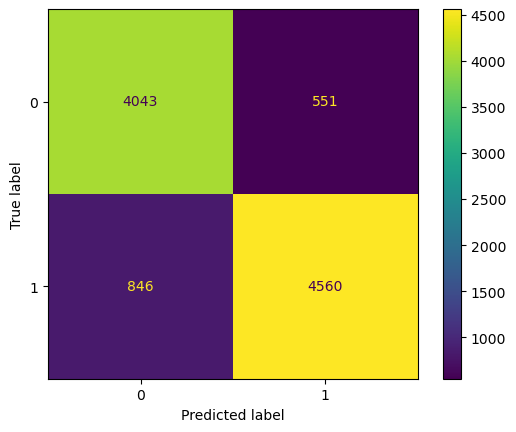

In [26]:
# Confusion Matrix Plot Best Model
best_model[0].plot_matrix.plot()